### Técnicas Básicas de NLP en el Text Mining

Aquí se muestran los códigos con las dos principaes librerias mencionadas.

En primer lugar, instalamos las librerías de programación a utiizar:

* <b>NLTK</b>: Descargamos la librería y complementamos necesario
* <b>Spacy</b>: Descargamos la librería y los modelos pre-entrenados en_core_web_sm y es_core_web_sm, modelos de DNN entrenados con noticias, blogs y comentarios en inglés y español respectivamente.


In [107]:
# Instalamos nltk
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-d

### Corpus y coprpora

Todo proceso de análisis textual comienza con un datast de documentos textuales, que generalmente se llama <b>corpus</b> o corpora cuando tratamos con varios dataset. El corpus generalmente está compuesto de texto bruto con algunos metadatos asociados, aunque esto no tiene por qué ser así.

En este Notebook vamos a trabajar con un corpus de noticias distibuido en la plataforma Kaggle llamado News summary. Este corpus está distribuido en formato csv, sin embargo es normal encontrar corpus con el formato tsv, o disponer de corpus almacenados en base de datos como MongoDB.

In [109]:
# Carga de datos

new_summary = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/news_summary.csv",encoding="latin-1")
new_summary.head(3)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...


El dataset está compuesto por un conjunto de filas, que llamamos documentos. Cada documento tiene un conjutno de metadatos como el autor, la fecha, el titular de la noticia y la web de la noticia y el texto asociado a esta.ç

Cada uno de los textos puede separarse en párrafors, frases y palabras según el tipo de documento y el tipo de análisis que se le vaya a aplicar.

En este caso, al ser un ejercicio, únicamente vamos a trabajar con el texto de los documentos, correspondiente al capo "text", así que extraeremos y transformaremos esta columna en una lista para trabajar más comodos:

In [111]:
# Transformar la columna "text" a una lista

texto_noticia=new_summary["text"].to_list()
texto_noticia

['The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.',
 'Malaika Arora slammed an Instagram user who trolled her for "divorcing a rich man" and "having fun with the alimony". "Her life now is all about wearing short clothes, going to gym or salon, enjoying vacation[s]," the user commented. Malaika responded, "You certainly got to get your damn facts right before spewing sh*t on me...when you know nothing about me."',
 "The Indira Gandhi Institute of Medical Sciences (IGIMS) in Patna on Thursday made corrections in its Marital Declaration Form by changing 'Virgin' option to 'Unmarried'. Earlier, Bihar Health Minister defined virgin as being an unmarried woman and did not consider the 

### Tokenización 

El texto bruto está compuesto por una secuencia de caracteres. Antes de su análisis los textos son divididos en fragmentos más pequeños conocidos como tokens. Un token puede ser ranto una palabra, como un símbolo de puntuación, un número o un emoticono, en el caso de estar analizando datos de redes sociales.

El proceso de división del texto en tokens se llama tokenización. Aquí se muestra el proceso tanto para la librería Spacy como para la librería NLTK para un único texto del corpus.

<b>NLTK</b> 

El tokenizador estándar de NLTK se llama word_tokenize. 

In [113]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 

# Cogemos un subset de las noticias para acelerar el proceso:
subset_noticias = texto_noticia[0:100]
print(subset_noticias[4])

# Segmentar las frases de la noticia 5 (indice 4) 
sentences = sent_tokenize(subset_noticias[4])
for num,sentence in enumerate(sentences):
    print("La oriación número {} es: \n {}".format(num,sentence))

Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days. A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed. The initiative has been backed by the Maharashtra government.
La oriación número 0 es: 
 Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days.
La oriación número 1 es: 
 A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed.
La oriación número 2 es: 
 The initiative has been backed by the Maharashtra government.


Podemos segmentar todos los tokens de un documento de forma global.

In [115]:
# Segmentar los tokens de la noticia 5 (indice 4)
tokens = word_tokenize(subset_noticias[4])
for num,token in enumerate(tokens):
    print("El token {} es {}".format(num,token))

El token 0 es Hotels
El token 1 es in
El token 2 es Maharashtra
El token 3 es will
El token 4 es train
El token 5 es their
El token 6 es staff
El token 7 es to
El token 8 es spot
El token 9 es signs
El token 10 es of
El token 11 es sex
El token 12 es trafficking
El token 13 es ,
El token 14 es including
El token 15 es frequent
El token 16 es requests
El token 17 es for
El token 18 es bed
El token 19 es linen
El token 20 es changes
El token 21 es and
El token 22 es 'Do
El token 23 es not
El token 24 es disturb
El token 25 es '
El token 26 es signs
El token 27 es left
El token 28 es on
El token 29 es room
El token 30 es doors
El token 31 es for
El token 32 es days
El token 33 es .
El token 34 es A
El token 35 es mobile
El token 36 es phone
El token 37 es app
El token 38 es called
El token 39 es Rescue
El token 40 es Me
El token 41 es ,
El token 42 es which
El token 43 es will
El token 44 es allow
El token 45 es staff
El token 46 es to
El token 47 es alert
El token 48 es police
El token 4

Pero tambien se puede segmentar los tokens de cada una de las frases separadamente:

In [117]:
# Segmentar las frases de la noticia 5
sentences = sent_tokenize(subset_noticias[4])
for num_sen,sentence in enumerate(sentences):
    tokens = word_tokenize(sentence)
    for num_token,token in enumerate(tokens):
        print("El token {} de la frase {} es: {}".format(num_token,num_sen,token))

El token 0 de la frase 0 es: Hotels
El token 1 de la frase 0 es: in
El token 2 de la frase 0 es: Maharashtra
El token 3 de la frase 0 es: will
El token 4 de la frase 0 es: train
El token 5 de la frase 0 es: their
El token 6 de la frase 0 es: staff
El token 7 de la frase 0 es: to
El token 8 de la frase 0 es: spot
El token 9 de la frase 0 es: signs
El token 10 de la frase 0 es: of
El token 11 de la frase 0 es: sex
El token 12 de la frase 0 es: trafficking
El token 13 de la frase 0 es: ,
El token 14 de la frase 0 es: including
El token 15 de la frase 0 es: frequent
El token 16 de la frase 0 es: requests
El token 17 de la frase 0 es: for
El token 18 de la frase 0 es: bed
El token 19 de la frase 0 es: linen
El token 20 de la frase 0 es: changes
El token 21 de la frase 0 es: and
El token 22 de la frase 0 es: 'Do
El token 23 de la frase 0 es: not
El token 24 de la frase 0 es: disturb
El token 25 de la frase 0 es: '
El token 26 de la frase 0 es: signs
El token 27 de la frase 0 es: left
El toke

### Unigramas, Bigramas y N-gramas

En ocasiones, la información proporcionada por un token no es suficiente.

Existen palabras que tienen relación con los términos previos y/o posteriores. Desde un punto de vista naive, la manera de conseguir el contexto de cada palabra es mediante los n-gramas.

Los n-gramas son secuencias de n tokens consecutivos provenientes de un texto. La combinación de n-gramas puede proporcioanr información sobre la temática de un texto. Generalmente se generan unigramas, que son iguales que los token del texto. Los Bigramas, que son combinaciones pareades de tokens y los tigramas que on triadas de tokens

<b>NLTK</b>

En NLTK los ngrams se consiguen a traves de un método dentro del modulo util de la librería.

In [120]:
from nltk.util import ngrams

Vamos a generar una función para crear n-grams de distinto tamaño.

In [122]:
def extraer_ngramas(datos,numero):
    n_grams = ngrams(word_tokenize(datos),numero)
    return [" ".join(grams) for grams in n_grams]

Ahora vamos a generar un conjunto de bigramas, trigramas y 4-gramas de la noticia 4:

In [124]:
# Cogemos un subset de las noticias para acelerar el proceso:

subset_noticias = texto_noticia[0:100]

# Calculamos los bigramas, trigramas y 4 gramas de la noticia 4

print("Unigramas: ", extraer_ngramas(subset_noticias[4],1))
print("Biigramas: ", extraer_ngramas(subset_noticias[4],2))
print("Trigramas: ", extraer_ngramas(subset_noticias[4],3))
print("4-gramas: ", extraer_ngramas(subset_noticias[4],4))


Unigramas:  ['Hotels', 'in', 'Maharashtra', 'will', 'train', 'their', 'staff', 'to', 'spot', 'signs', 'of', 'sex', 'trafficking', ',', 'including', 'frequent', 'requests', 'for', 'bed', 'linen', 'changes', 'and', "'Do", 'not', 'disturb', "'", 'signs', 'left', 'on', 'room', 'doors', 'for', 'days', '.', 'A', 'mobile', 'phone', 'app', 'called', 'Rescue', 'Me', ',', 'which', 'will', 'allow', 'staff', 'to', 'alert', 'police', 'of', 'suspicious', 'behaviour', ',', 'will', 'be', 'developed', '.', 'The', 'initiative', 'has', 'been', 'backed', 'by', 'the', 'Maharashtra', 'government', '.']
Biigramas:  ['Hotels in', 'in Maharashtra', 'Maharashtra will', 'will train', 'train their', 'their staff', 'staff to', 'to spot', 'spot signs', 'signs of', 'of sex', 'sex trafficking', 'trafficking ,', ', including', 'including frequent', 'frequent requests', 'requests for', 'for bed', 'bed linen', 'linen changes', 'changes and', "and 'Do", "'Do not", 'not disturb', "disturb '", "' signs", 'signs left', 'lef

<b>Visualización</b>

A continuación, vamos a calcular los tokens y bigramas de todo el corpus de documentos y vamos a generar una visualización.

In [183]:
def frecuencia_tokens(lista): 
    # Creamos diccionario vacío 
    frecuencia= {}
    for item in lista:
        if (item in frecuencia):
            frecuencia[item] +=1
        else:
            frecuencia[item] = 1
    return frecuencia

In [185]:
# Extraemos los tokens de todos los textos y los introducimos en una lista común:

lista_tokens= list()
for i in subset_noticias:
    tokens_document= word_tokenize(i)
    # Añadimos esos tokens como nuevos elementos
    lista_tokens.extend(tokens_document)

# Calculemos la frecuecnia 
dict_freq = frecuencia_tokens(lista_tokens)

In [187]:
# El problema lo ecnontramos en la función frecuencia_tokens 
print(dict_freq)

{'The': 82, 'Administration': 3, 'of': 147, 'Union': 3, 'Territory': 2, 'Daman': 2, 'and': 125, 'Diu': 2, 'has': 60, 'revoked': 1, 'its': 17, 'order': 2, 'that': 63, 'made': 4, 'it': 32, 'compulsory': 4, 'for': 68, 'women': 8, 'to': 136, 'tie': 2, 'rakhis': 2, 'their': 11, 'male': 3, 'colleagues': 2, 'on': 76, 'the': 271, 'occasion': 1, 'Rakshabandhan': 3, 'August': 7, '7': 3, '.': 281, 'administration': 1, 'was': 43, 'forced': 2, 'withdraw': 1, 'decision': 3, 'within': 3, '24': 2, 'hours': 3, 'issuing': 1, 'circular': 3, 'after': 25, 'received': 3, 'flak': 1, 'from': 29, 'employees': 4, 'slammed': 3, 'social': 3, 'media': 3, 'Malaika': 2, 'Arora': 1, 'an': 25, 'Instagram': 2, 'user': 2, 'who': 17, 'trolled': 4, 'her': 22, '``': 58, 'divorcing': 1, 'a': 156, 'rich': 1, 'man': 10, "''": 58, 'having': 1, 'fun': 1, 'with': 31, 'alimony': 1, 'Her': 1, 'life': 4, 'now': 4, 'is': 48, 'all': 5, 'about': 15, 'wearing': 3, 'short': 2, 'clothes': 1, ',': 242, 'going': 1, 'gym': 1, 'or': 4, 'salo

Vamos a ordenar el diccionario, para tomar sólo los valores mayores de 20:

In [189]:
# Ordenamos el diccionario por la frecuencia de sus palabras
dict_freq_order = sorted(dict_freq.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs = list()
for i in dict_freq_order:
  if i[1] > 30:
    token_names.append(i[0])
    token_freqs.append(i[1])


In [191]:
#No hay nada en token_names ni token_freqs
print(token_freqs)

[281, 271, 242, 156, 147, 136, 125, 112, 82, 76, 68, 67, 63, 60, 58, 58, 48, 43, 43, 35, 33, 32, 31, 31, 31]


Dibujemos:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '.'),
  Text(1, 0, 'the'),
  Text(2, 0, ','),
  Text(3, 0, 'a'),
  Text(4, 0, 'of'),
  Text(5, 0, 'to'),
  Text(6, 0, 'and'),
  Text(7, 0, 'in'),
  Text(8, 0, 'The'),
  Text(9, 0, 'on'),
  Text(10, 0, 'for'),
  Text(11, 0, 'said'),
  Text(12, 0, 'that'),
  Text(13, 0, 'has'),
  Text(14, 0, '``'),
  Text(15, 0, "''"),
  Text(16, 0, 'is'),
  Text(17, 0, 'was'),
  Text(18, 0, "'s"),
  Text(19, 0, 'by'),
  Text(20, 0, 'he'),
  Text(21, 0, 'it'),
  Text(22, 0, 'with'),
  Text(23, 0, 'as'),
  Text(24, 0, 'be')])

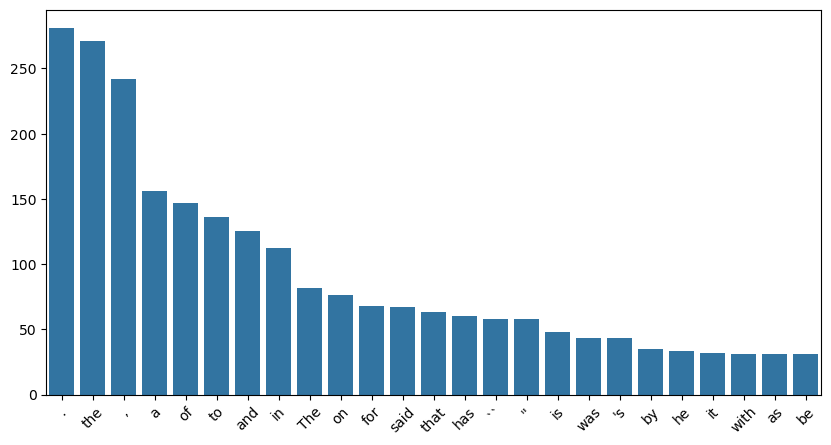

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,5]
sns_g = sns.barplot(x=token_names,y=token_freqs)
plt.xticks(rotation=45)

In [200]:
# Podemos quitar los símbolos de puntuación y stopwords con:

import string
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [202]:
frase = "This is not a trial"
from nltk.tokenize import word_tokenize 
tokens = word_tokenize(frase)
tokens

['This', 'is', 'not', 'a', 'trial']

In [204]:
tokens_sw= list()
for i in tokens:
    if i not in stop_words:
        tokens_sw.append(i)
tokens_sw

['This', 'trial']

### Lematización y stemming

Las lemas son las formas canónicas del léxico de un idioma. Por ejemplo, en el caso del español, los verbos presentan una flexión verbal, conocida como comúnmente como conjugación, utilizada para adaptar el verbo a diferentes situaciones de contexto (número, género y tiempo verbal) y presentando distinta forma escrita. En algunas ocasiones, es útil utilizar el lema de los verbos y otras palabras para reducir la dimensionalidad en los modelos predictivos. Este proceso es conocido como lematización. Cuando se lematiza se obtiene palabras reales ya que se utilizan diccionarios jerárquicos para obtener el lema. Este diccioanrio jerárquico es conocido como WordNet.

Un caso específico y simple de la lematización es el stemming, que consiste en utilizar reglas sintácticas para quitar la finalización de las palabras y reducirlas así una forma común llamada stem. Hay muchos stemmers populares como el de Porter o el de Snowball. Es importante mencionar que no siempre que se hace stemming de una palara esta es una palabra real, si no una palabra sin su última(s) letras.

#### Stemming

En NLTK hay varias implementaciones de algoritmos de Stemming. Aquí mostraremos los dos más utilziados.

* Algoritmo de Porter Stemming: Algorimto que solo funciona en inglés y que funciona correctamente con la mayoría de las palabras en ese idioma. Sirve para quitar sustituir los sufijos de las palabras.
* Algorimto de SnowballStemmer: Algorimto de Stemming que soporta 13 lenguas en NLTK, incluyendo español. Es una versión mejorada del algoritmo de Porter Stemming.

In [208]:
from nltk.stem import PorterStemmer,SnowballStemmer

In [246]:
# In English

list_of_english_words = ["Speaking","speaks","Speaker","dogs","buses","pieces","compute","computer","computed","computing"]
PStemmer = PorterStemmer()
SStemmer = SnowballStemmer("english")

In [248]:
print("Terminos en inglés:")
for word in list_of_english_words:
    print("Palabra original: {}, Porter Stemmer: {},Snowball: {}".format(word,PStemmer.stem(word),SStemmer.stem(word)))

Terminos en inglés:
Palabra original: Speaking, Porter Stemmer: speak,Snowball: speak
Palabra original: speaks, Porter Stemmer: speak,Snowball: speak
Palabra original: Speaker, Porter Stemmer: speaker,Snowball: speaker
Palabra original: dogs, Porter Stemmer: dog,Snowball: dog
Palabra original: buses, Porter Stemmer: buse,Snowball: buse
Palabra original: pieces, Porter Stemmer: piec,Snowball: piec
Palabra original: compute, Porter Stemmer: comput,Snowball: comput
Palabra original: computer, Porter Stemmer: comput,Snowball: comput
Palabra original: computed, Porter Stemmer: comput,Snowball: comput
Palabra original: computing, Porter Stemmer: comput,Snowball: comput


In [250]:
# En Español

lista_de_palabras_español =["Hablando","Habla","Hablador","Hablará","ha hablado"]
SStemer_spanish = SnowballStemmer("spanish")
print("Términso en español:")
for word in lista_de_palabras_español:
    print("Palabra originial: {}, Snowball: {}".format(word,SStemer_spanish.stem(word)))

Términso en español:
Palabra originial: Hablando, Snowball: habl
Palabra originial: Habla, Snowball: habl
Palabra originial: Hablador, Snowball: hablador
Palabra originial: Hablará, Snowball: habl
Palabra originial: ha hablado, Snowball: ha habl


#### Lematización

En español no se puede utilziar este método, dado que WordNet solo tiene términos en inglés. En este ejemplo vamos a lematizar palabras individuales, sin una categoría gramatical asignada. Si tuvieramos la PoS funcionaría con mejor rendimiento.

In [252]:
from nltk.stem import WordNetLemmatizer

lematizador = WordNetLemmatizer()
list_of_english_words =["Speaking","speaks","Speaker","dogs","buses","pieces","compute","computer","computed","computing"]
for word in list_of_english_words:
    print(" {} ---> {}".format(word,lematizador.lemmatize(word)))

 Speaking ---> Speaking
 speaks ---> speaks
 Speaker ---> Speaker
 dogs ---> dog
 buses ---> bus
 pieces ---> piece
 compute ---> compute
 computer ---> computer
 computed ---> computed
 computing ---> computing


Notese que, a diferencia del stemmer, las palabras en plural no se forman solo con una s y que se producían errores, aquí lo hace sin problema.

### Part-Of-Speech Tagging

El Part-Of_Speech Tagging o la asignación de categorías gramaticales a una frase es el proceso en el que una lista de palabras es etiquetada con su categoría gramatical, es decir que identifica si la palabra es un numbre, un adjetivo, un verbo, un adverbio, etc.

La asignación de etiquetas gramaticales es interesante cuando se quiere hacer análisis gramatical de una oración, para saber si una palabra tiene una acepción u otra, o incluso para extraer características artificiales cuando se quiere hacer una clasificación textual o similar.

Para ver el listado completo solo hay que ejecutar la siguiente línea de código.

In [261]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [265]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Segemntamos los tokens
tokens = word_tokenize(subset_noticias[4])

# Utilziamos la función pos_tag() de nltk para obtener las etiquetas
pos_tag(tokens)

[('Hotels', 'NNS'),
 ('in', 'IN'),
 ('Maharashtra', 'NNP'),
 ('will', 'MD'),
 ('train', 'VB'),
 ('their', 'PRP$'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('spot', 'VB'),
 ('signs', 'NNS'),
 ('of', 'IN'),
 ('sex', 'NN'),
 ('trafficking', 'NN'),
 (',', ','),
 ('including', 'VBG'),
 ('frequent', 'JJ'),
 ('requests', 'NNS'),
 ('for', 'IN'),
 ('bed', 'NN'),
 ('linen', 'NN'),
 ('changes', 'NNS'),
 ('and', 'CC'),
 ("'Do", 'MD'),
 ('not', 'RB'),
 ('disturb', 'VB'),
 ("'", "''"),
 ('signs', 'NNS'),
 ('left', 'VBD'),
 ('on', 'IN'),
 ('room', 'NN'),
 ('doors', 'NNS'),
 ('for', 'IN'),
 ('days', 'NNS'),
 ('.', '.'),
 ('A', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('app', 'NN'),
 ('called', 'VBN'),
 ('Rescue', 'NNP'),
 ('Me', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('allow', 'VB'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('alert', 'VB'),
 ('police', 'NN'),
 ('of', 'IN'),
 ('suspicious', 'JJ'),
 ('behaviour', 'NN'),
 (',', ','),
 ('will', 'MD'),
 ('be', 'VB'),
 ('developed', 'VBN'),
 ('.',

### Named-entity recognition

La extracción de entidades de un documentao es un labor esencial en la análitica de textos. En algunas ocasiones puede ser interesante si se nombra a una persona, a una ciudad, un país o incluso a un medicamento, en el caso de los textos clínicos.

Existen sistemas NER (Named-enity recognition) espcíficos para cada campo de aplicación. 

En NLTK antes de detectar es necesario la obtención de la tokenización y la POS tag antes de identificar entidades, ya que utiliza las etiquetas POS y reglas internas para encontrar que elementos son personas u otro ipo de entidad.

Cuando los textos son extridos de internet, hay que quitar los espacios que puede haber en una frase, para que se extraiga mejor las categorías gramaticales de éstos y poder así reconocer mejor las organizaciones o personas en el texto. En eeste caso están bastante limpios, así que no hace falta hacerlo.

Importamos la función <code>ne_chunk</code>, que necesita un conjunto de tokens etiquetrados PoS previamente. Así que antes hay que preprocesar el documento. Lo haremos con la función <code>preprocesar()</code>

In [269]:
from nltk.chunk import ne_chunk

In [271]:
def preprocess(documento):
    documento_tok = word_tokenize(documento)
    documento_pos=pos_tag(documento_tok)
    return documento_pos

In [275]:
# Ejecutamos la función sobre la noticia 4 y extraigamos las named-entities:
noticia = preprocess(subset_noticias[4])
noticia

[('Hotels', 'NNS'),
 ('in', 'IN'),
 ('Maharashtra', 'NNP'),
 ('will', 'MD'),
 ('train', 'VB'),
 ('their', 'PRP$'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('spot', 'VB'),
 ('signs', 'NNS'),
 ('of', 'IN'),
 ('sex', 'NN'),
 ('trafficking', 'NN'),
 (',', ','),
 ('including', 'VBG'),
 ('frequent', 'JJ'),
 ('requests', 'NNS'),
 ('for', 'IN'),
 ('bed', 'NN'),
 ('linen', 'NN'),
 ('changes', 'NNS'),
 ('and', 'CC'),
 ("'Do", 'MD'),
 ('not', 'RB'),
 ('disturb', 'VB'),
 ("'", "''"),
 ('signs', 'NNS'),
 ('left', 'VBD'),
 ('on', 'IN'),
 ('room', 'NN'),
 ('doors', 'NNS'),
 ('for', 'IN'),
 ('days', 'NNS'),
 ('.', '.'),
 ('A', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('app', 'NN'),
 ('called', 'VBN'),
 ('Rescue', 'NNP'),
 ('Me', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('allow', 'VB'),
 ('staff', 'NN'),
 ('to', 'TO'),
 ('alert', 'VB'),
 ('police', 'NN'),
 ('of', 'IN'),
 ('suspicious', 'JJ'),
 ('behaviour', 'NN'),
 (',', ','),
 ('will', 'MD'),
 ('be', 'VB'),
 ('developed', 'VBN'),
 ('.',

In [279]:
noticia = preprocess(subset_noticias[4])
ne_tree= ne_chunk(noticia)
print(ne_tree)

(S
  Hotels/NNS
  in/IN
  (GPE Maharashtra/NNP)
  will/MD
  train/VB
  their/PRP$
  staff/NN
  to/TO
  spot/VB
  signs/NNS
  of/IN
  sex/NN
  trafficking/NN
  ,/,
  including/VBG
  frequent/JJ
  requests/NNS
  for/IN
  bed/NN
  linen/NN
  changes/NNS
  and/CC
  'Do/MD
  not/RB
  disturb/VB
  '/''
  signs/NNS
  left/VBD
  on/IN
  room/NN
  doors/NNS
  for/IN
  days/NNS
  ./.
  A/DT
  mobile/JJ
  phone/NN
  app/NN
  called/VBN
  (PERSON Rescue/NNP Me/NNP)
  ,/,
  which/WDT
  will/MD
  allow/VB
  staff/NN
  to/TO
  alert/VB
  police/NN
  of/IN
  suspicious/JJ
  behaviour/NN
  ,/,
  will/MD
  be/VB
  developed/VBN
  ./.
  The/DT
  initiative/NN
  has/VBZ
  been/VBN
  backed/VBN
  by/IN
  the/DT
  (GPE Maharashtra/NNP)
  government/NN
  ./.)
